# Coursera_Capstone

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, preprocessing, model_selection 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Import Data

In [2]:
data = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

## Exploratory Data Analysis

## Distribution of Target

The target of our research problem, which is the accident severity, is a binary variable, so this is a binary classification problem

- 1 refers to Property Damage Only Collision
- 2 refers to Injury Collision

In [5]:
data["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

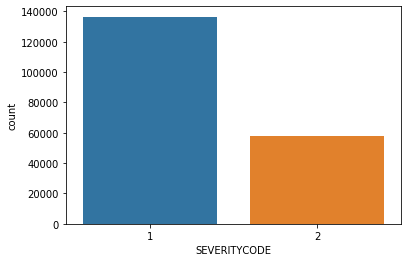

In [6]:
sns.countplot('SEVERITYCODE',data=data)

## Correlation between Severity and Other Attributes
I selected a few features that seems most closely related to accident severity before moving forward with some further analysis

In [31]:
features = ['ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE', 'WEATHER','ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']
target = 'SEVERITYCODE'
df = data[features+[target]]

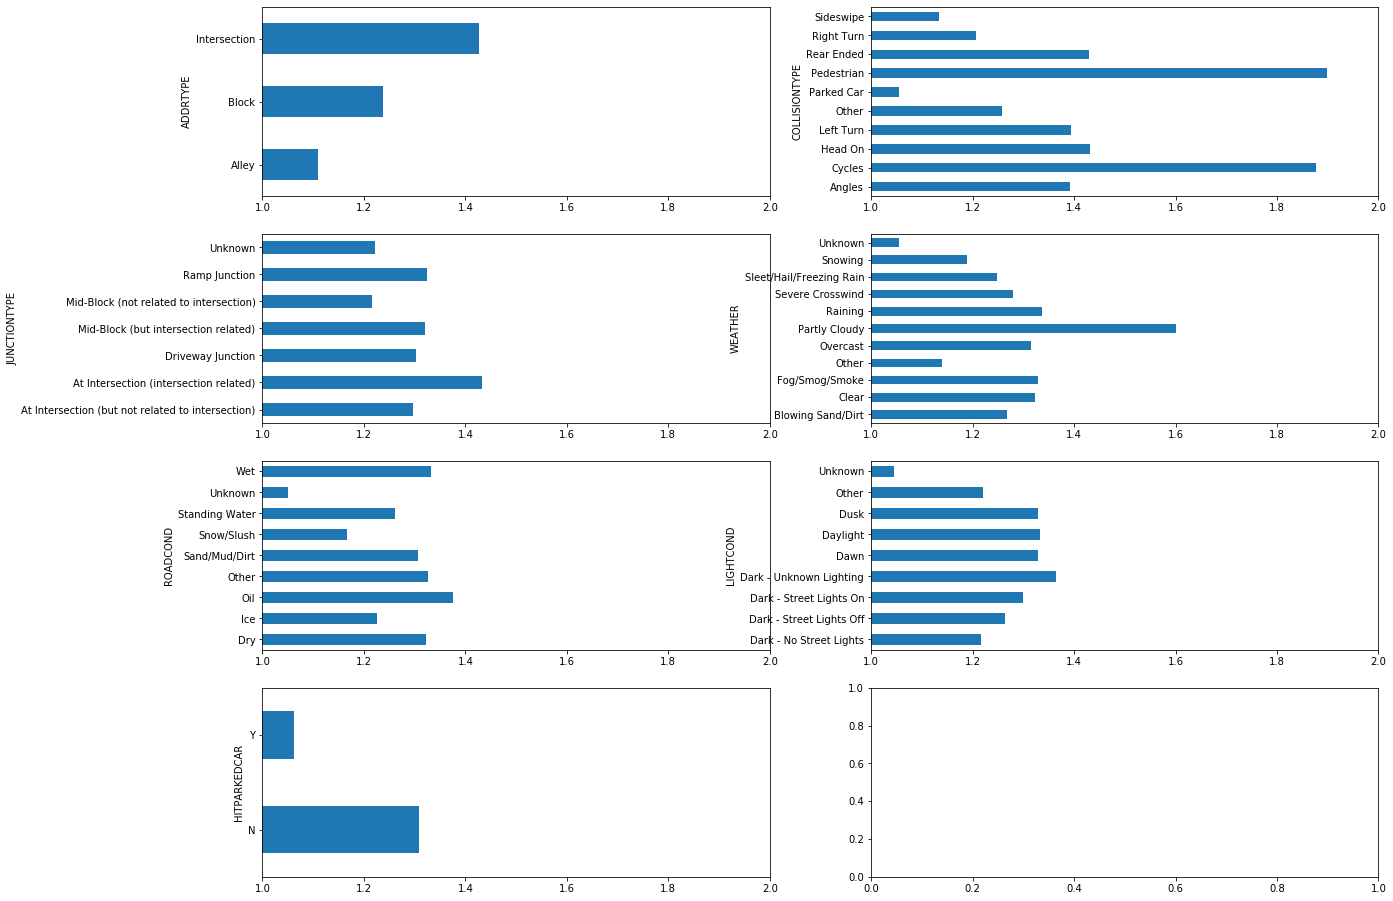

In [8]:
figbi, axesbi = plt.subplots(4, 2, figsize=(20, 16))
df.groupby('ADDRTYPE')['SEVERITYCODE'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[1,2])
df.groupby('COLLISIONTYPE')['SEVERITYCODE'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[1,2])
df.groupby('JUNCTIONTYPE')['SEVERITYCODE'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[1,2])
df.groupby('WEATHER')['SEVERITYCODE'].mean().plot(kind='barh',ax=axesbi[1,1],xlim=[1,2])
df.groupby('ROADCOND')['SEVERITYCODE'].mean().plot(kind='barh',ax=axesbi[2,0],xlim=[1,2])
df.groupby('LIGHTCOND')['SEVERITYCODE'].mean().plot(kind='barh',ax=axesbi[2,1],xlim=[1,2])
df.groupby('HITPARKEDCAR')['SEVERITYCODE'].mean().plot(kind='barh',ax=axesbi[3,0],xlim=[1,2])

## Feature Engineering

In [36]:
features = ['ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE', 'WEATHER','ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']
df = data[features+[target]]
df = df.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       182895 non-null  object
 1   COLLISIONTYPE  182895 non-null  object
 2   JUNCTIONTYPE   182895 non-null  object
 3   WEATHER        182895 non-null  object
 4   ROADCOND       182895 non-null  object
 5   LIGHTCOND      182895 non-null  object
 6   HITPARKEDCAR   182895 non-null  object
 7   SEVERITYCODE   182895 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 12.6+ MB


In [33]:
cat_transformers= Pipeline(steps=[  ('cat_encoder', OneHotEncoder(sparse=False))] )
preprocess_pipeline = ColumnTransformer( transformers=[ ("categorical", cat_transformers, features) ] )

## Fit a Logistic Regression Model

In [24]:
logistic_clf = linear_model.LogisticRegression(solver='liblinear')

In [34]:
train_data = df[features]
y_train = df[target]

In [35]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),
                                 ("classify", logistic_clf)
                                ]
                         )

scores = cross_val_score(model_pipeline, train_data, y_train, cv=5)
print("Logistic avg cross val score={s:3.2f}\n".format(s=scores.mean()) )

Logistic avg cross val score=0.75

